In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Construcción del dataset MeLiSA

In [9]:
def plot_heatmap(matrix,field1,field2):

    fig, ax = plt.subplots(1,1,figsize=(len(field1),len(field2)))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(field2)))
    ax.set_yticks(np.arange(len(field1)))
    # ... and label them with the respective list entries
    ax.set_xticklabels([str(s) for s in field2])
    ax.set_yticklabels([str(s) for s in field1])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(field1)):
        for j in range(len(field2)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    fig.tight_layout()
    return fig, ax

Los directorios donde se descargaron los comentarios son:
* `28-melisa/parts/`: Contiene los reviews de diciembre de 2021
* `29-mercado-libre-api-v3/parts/`: Contiene los reviews de agosto de 2020
* `29-mercado-libre-api-v3/peru_parts/`: Reviews de Peru (enero 2021)
* `29-mercado-libre-api-v3/ven_parts/`: Reviews de Venezuela (enero 2021)



Se juntaron todos estos archivos en uno solo, llamado `reviews_all_parts_with_orig_cat_name_04-01-2021.csvv`, en el cual se modificaron los reviews obtenidos de la siguiente manera:

* Se eliminaron los que tenían id repetido.
* Cambiamos todos los espacios compuestos `'\s+'` de los campos `review_content` y `review_title` por espacios simples `' '` y se eliminaron los duplicados que coincidían simultáneamente en los campos `review_content`,  `review_title` y `review_rate`.

Los campos contenidos en este csv son: 
* `prod_id`: ID único del producto comentado,
* `cat_id`: ID único de la categoría a la que pertenece el producto comentado,
* `review_id`: ID único del comentario,
* `country`: País al que pertenece el comentario,
* `prod_title`: Título del producto comentado
* `reviewer_id`: ID único del usuario que comentó
* `review_date`: Fecha del comentario
* `review_status`: Si se encuentra publicado o no el comentario,
* `review_title`: Título del comentario,
* `review_content`: Contenido del comentario,
* `review_rate`: Puntuación del comentario,
* `review_likes`: Cantidad de likes del comentario,
* `review_dislikes`: Cantidad de dislikes del comentario,
* `category`: Nombre de la categoría a la que pertenece el producto comentado.

(<Figure size 576x360 with 1 Axes>, <AxesSubplot:>)

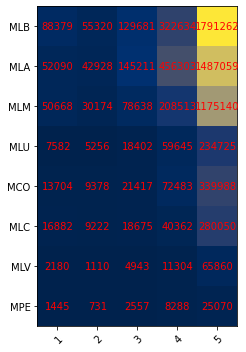

In [10]:
countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
filename = '/home/lestien/Documents/BecaNLP/Programs/28-melisa/reviews_all_parts_with_orig_cat_name_04-01-2021.csv'
df = pd.read_csv(filename,lineterminator='\n',sep=',')

matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,f1 in enumerate(countries):
    for j,f2 in enumerate(rates):
        mymask = (df['review_rate'] == f2) & (df['country'] == f1)
        matrix[i,j] = len(df[mymask])

plot_heatmap(matrix,countries,rates)

Ahora usamos el siguiente mapeo para simplificar la clasificación de categorías a la que pertenece cada producto comentado:

```Python
generalize_categories = {

	'Hogar, Muebles y Jardín': 'Hogar / Casa',
	'Casa, Móveis e Decoração': 'Hogar / Casa',
	'Herramientas y Construcción': 'Hogar / Casa',
	'Industrias y Oficinas': 'Hogar / Casa',
	'Ferramentas e Construção': 'Hogar / Casa',
	'Bebés': 'Hogar / Casa',
	'Animales y Mascotas': 'Hogar / Casa',
	'Hogar y Muebles': 'Hogar / Casa',
	'Bebês': 'Hogar / Casa',
	'Animais': 'Hogar / Casa',
	'Indústria e Comércio': 'Hogar / Casa',
	'Industrias': 'Hogar / Casa',

	'Computación': 'Tecnología y electrónica / Tecnologia e electronica',
	'Accesorios para Vehículos': 'Tecnología y electrónica / Tecnologia e electronica',
	'Acessórios para Veículos': 'Tecnología y electrónica / Tecnologia e electronica',
	'Electrónica, Audio y Video': 'Tecnología y electrónica / Tecnologia e electronica',
	'Electrodomésticos y Aires Ac.': 'Tecnología y electrónica / Tecnologia e electronica',
	'Celulares y Telefonía': 'Tecnología y electrónica / Tecnologia e electronica',
	'Informática': 'Tecnología y electrónica / Tecnologia e electronica',
	'Eletrônicos, Áudio e Vídeo': 'Tecnología y electrónica / Tecnologia e electronica',
	'Electrodomésticos': 'Tecnología y electrónica / Tecnologia e electronica',
	'Eletrodomésticos': 'Tecnología y electrónica / Tecnologia e electronica',
	'Celulares y Teléfonos': 'Tecnología y electrónica / Tecnologia e electronica',
	'Cámaras y Accesorios': 'Tecnología y electrónica / Tecnologia e electronica',
	'Consolas y Videojuegos': 'Tecnología y electrónica / Tecnologia e electronica',
	'Celulares e Telefones': 'Tecnología y electrónica / Tecnologia e electronica',
	'Câmeras e Acessórios': 'Tecnología y electrónica / Tecnologia e electronica',

	'Deportes y Fitness': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Belleza y Cuidado Personal': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',  
	'Calçados, Roupas e Bolsas': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Esportes e Fitness': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Ropa y Accesorios': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Salud y Equipamiento Médico': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Beleza e Cuidado Pessoal': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Ropa, Bolsas y Calzado': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Saúde': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Vestuario y Calzado': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Ropa, Calzados y Accesorios': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Ropa, Zapatos y Accesorios': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
	'Estética y Belleza': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',

	'Juegos y Juguetes': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Brinquedos e Hobbies': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Arte, Librería y Mercería': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Instrumentos Musicales': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Arte, Papelaria e Armarinho': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Arte, Papelería y Mercería': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Joyas y Relojes': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Instrumentos Musicais': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Games': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Joias e Relógios': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Souvenirs, Cotillón y Fiestas': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Festas e Lembrancinhas': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Recuerdos, Cotillón y Fiestas': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Antigüedades y Colecciones': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Libros, Revistas y Comics': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Relojes y Joyas': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Antiguidades e Coleções': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Arte, Librería y Cordonería': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Recuerdos, Piñatería y Fiestas': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Música, Películas y Series': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Música, Filmes e Seriados': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Relojes, Joyas y Bisutería': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Música y Películas': 'Arte y entretenimiento / Arte e Entretenimiento',
	'Livros, Revistas e Comics': 'Arte y entretenimiento / Arte e Entretenimiento',

	'Alimentos y Bebidas': 'Alimentos y Bebidas / Alimentos e Bebidas',
	'Alimentos e Bebidas': 'Alimentos y Bebidas / Alimentos e Bebidas',

	'Servicios': np.nan,
	'Serviços': np.nan,
	'Agro': np.nan,
	'Otras categorías': np.nan,
	'Mais Categorias': np.nan,
	'Otras Categorías': np.nan,
	'Ingressos': np.nan,
	'Entradas para Eventos': np.nan,
	'Boletas para Espectáculos': np.nan,
	'Autos, Motos y Otros': np.nan

}
```

Luego, asignamos un límite a la cantidad de comentarios que puede haber para cada producto. Para priorizar algunos comentarios más que otros y poder tener un conjunto de test balanceado, se asignó una puntuación a cada rate:

|rate | score|
|-----|-----------|
|1 | 0.75 |
|2 | 1 |
|3 | 0.5 |
|4 | 0.25 |
|5 | 0 |

y para los comentarios con igual score, se los ordena a su vez según otra puntuación dada por un promedio ponderado entre $l^*$, un coeficiente calculado a partir de la longitud del comentario, y $v^*$, otro coeficiente calculado a partir de la diferencia entre likes y dislikes del comentario.
$$
score = \frac{1}{2}l^* + v^*
$$
donde 
$$
\begin{align*}
l^* &= \frac{l - l_{min}}{l_{max} - l_{min}}\\
l &= max(0,len - 50)
\end{align*}
$$
y $len$ es el largo del comentario (cantidad de caracteres). Por otro lado,
$$
\begin{align*}
v* &= \frac{v - v_{min}}{v_{max} - v_{min}} \\
v &= \log( d - d_{min} + 1) \\
d &= likes - dislikes
\end{align*}
$$
Una vez ordenados según estas puntuaciones, se limitaron a 30 comentarios por producto.

A continuación separamos por categoría, rate y país del comentario, y, nuevamente ordenando con el mismo criterio que antes, elegimos una cantidad de comentarios para esos filtros dado por la mínima cantidad de comentarios encontrados en esa categoría, rate y país. Por ejemplo, si se encontró que, una vez limitados los reviews por el método anterior había 462 comentarios de rate 2 en MLA en la categoría "alimentos", mientras en los otros rates del mismo país y categoría había más, entonces la cantidad de comentarios en la categoría "alimentos", en el país MLA y en TODOS los rates, es 462.

Esto dio como resultado, el archivo `reviews_all_parts_sampled_by_cat_and_limited_by_prods_09-01-2021.csv`

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


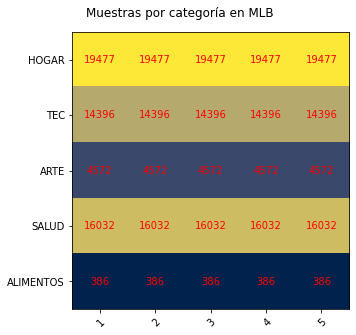

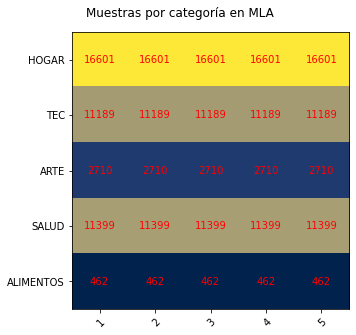

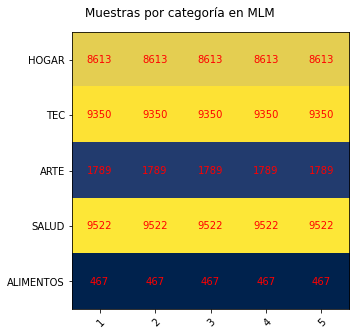

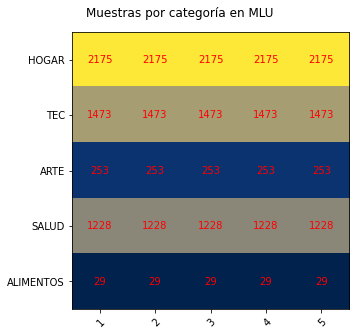

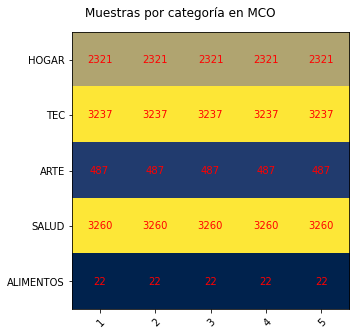

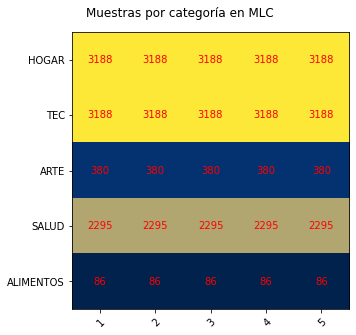

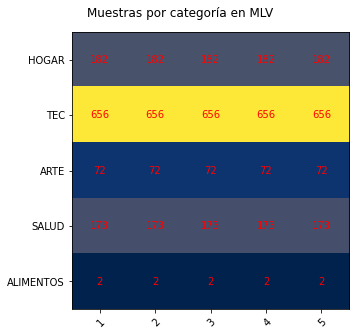

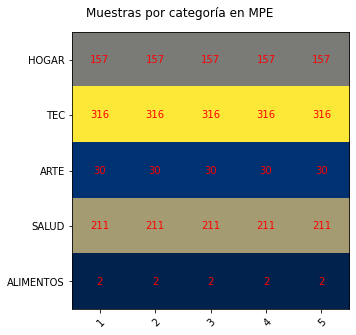

In [11]:
countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
filename = '/home/lestien/Documents/BecaNLP/Programs/28-melisa/reviews_all_parts_sampled_by_cat_and_limited_by_prods_09-01-2021.csv'
df = pd.read_csv(filename,lineterminator='\n',sep=',')

categories = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS'}


for country in countries:
    print(country)
    matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i, category in enumerate(categories.keys()):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & \
                    (df['category'] == category) & \
                    (df['country'] == country)
            matrix[i,j] = mymask.sum()

    fig, ax = plot_heatmap(matrix,categories.values(),rates)
    fig.suptitle('Muestras por categoría en {}'.format(country))

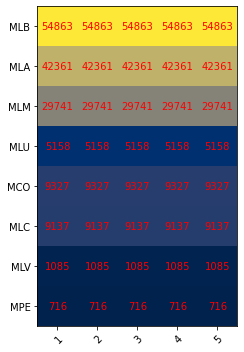

In [12]:
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,f1 in enumerate(countries):
    for j,f2 in enumerate(rates):
        mymask = (df['review_rate'] == f2) & (df['country'] == f1)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)

Para aaprovechar al máximo los comentarios disponibles, se hizo una inspección a mano de los comentarios que contenían algún caracter con poca ocurrencia. Estos comentarios fueron editados, o directamente removidos en el caso que no tuvieran algún contenido valorable. 

Además se hizo una detección manual del idioma de cada comentario. Para ello, primero se utilizaron 5 modelos diferentes de detección de idioma: spacy_es, spacy_pt, langdetect, langid y fasttext. En cada caso, se devuelve para cada comentario la probabilidad de que el texto estuviera en español o en portugués. Si la probabilidad estimada por el modelo era superior a $0.9$ para un determinado comentario, y además el idioma coincidía con el país de dicho idioma, entonces se consideraba que ese comentario era válido. Luego, se define una puntuacion dada por la cantidad de modelos que dieron como válido al resultado y se ordenan todos los comentarios según esta puntuación. Con esto, quedan los comentarios "más válidos" arriba y los "menos válidos" abajo, y es más fácil identificar los que pertenecen a otro idioma.

Con esta nueva colección de comentarios se volvieron a elegir los más relevantes, con el objetivo de balancear el dataset por categoría, producto y país. El resultado final, fueron los archivos `reviews_esp_cleaned.csv` y `reviews_por_cleaned.csv`.


In [ ]:
esp_countries = ['MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
filename = '/home/lestien/Documents/BecaNLP/Programs/28-melisa/reviews_all_parts_sampled_by_cat_and_limited_by_prods_09-01-2021.csv'
df = pd.read_csv(filename,lineterminator='\n',sep=',')